# Co je API?

## Klient a server

API (Application Programming Interface) je dohoda mezi dvěma stranami o tom, jak si mezi sebou budou povídat. Těmto stranám se říká klient a server.

**Server** je ta strana, která má zajímavé informace nebo něco zajímavého umí a umožňuje ostatním na internetu, aby toho využili. Server je program, který donekonečna běží na nějakém počítači a je připraven všem ostatním na internetu odpovídat na požadavky.

**Klient** je program, který posílá požadavky na server a z odpovědí se snaží poskládat něco užitečného. Klient je tedy mobilní aplikace s mráčky a sluníčky nebo náš prohlížeč, v němž si můžeme otevřít kurzovní lístek ČNB. Je to ale i Heureka robot, který za Heureku načítá informace o zboží v e-shopech.

_Serverové straně se v těchle materiálech nebudeme věnovat. Koho by to zajímalo, nechť se podívá na [cojeapi.cz](https://cojeapi.cz/)_

# Základní pojmy

Než se pustíme do tvorby klienta, projdeme si některé základní pojmy kolem API.

## Protokol

Celé dorozumívání mezi klientem a serverem se odehrává přes tzv. protokol. To není nic jiného, než smluvený způsob, co bude kdo komu posílat a jakou strukturu to bude mít. Protokolů je v počítačovém světě spousta, ale nás bude zajímat jen HTTP, protože ten využívají webová API a ostatně i web samotný. Není to náhoda, že adresa internetových stránek v prohlížeči zpravidla začíná http:// (nebo https://).

### HTTP

Dorozumívání mezi klientem a serverem probíhá formou požadavku (HTTP request), jenž posílá klient na server, a odpovědi (HTTP response), kterou server posílá zpět. Každá z těchto zpráv má své náležitosti.

### Požadavek (request)

+ **metoda** (HTTP method): Například metoda GET má tu vlastnost, že pouze čte a nemůžeme s ní tedy přes API něco změnit - je tzv. bezpečná. Kromě metody GET existují ještě metody POST (vytvořit), PUT (aktualizovat) a DELETE (odstranit), které nepotřebujeme, protože data z API budeme pouze získávat.
+ **adresa s parametry** (URL s query parameters):  Na konci běžné URL adresy otazník a za ním parametry. Pokud je parametrů víc, oddělují se znakem &. Adresa samotná nejčastěji určuje o jaká data půjde (v našem příkladě jsou to filmy) a URL parametry umožňují provést filtraci už na straně serveru a získat tím jen ta data, která nás opravdu zajímají (v našem případě dramata v délce 150 min)
        http://api.example.com/movies/
        http://api.example.com/movies?genre=drama&duration=150 
+ **hlavičky** (headers): Hlavičky jsou vlastně jen další parametry. Liší se v tom, že je neposíláme jako součást adresy a na rozdíl od URL parametrů podléhají nějaké standardizaci a konvencím.
+ **tělo** (body): Tělo zprávy je krabice, kterou s požadavkem posíláme, a do které můžeme vložit, co chceme. Tedy nejlépe něco, čemu bude API na druhé straně rozumět. Tělo může být prázdné. V těle můžeme poslat obyčejný text, data v nějakém formátu, ale klidně i obrázek. Aby API na druhé straně vědělo, co v krabici je a jak ji má rozbalovat, je potřeba s tělem zpravidla posílat hlavičku Content-Type.

Musíme vyčíst z dokumentace konkrétního API, jak požadavek správně poskládat.

### Odpověď (response)

+ **status kód** (status code): Číselný kód, kterým API dává najevo, jak požadavek zpracovalo. Podle první číslice kódu se kódy dělí na různé kategorie:
        1xx - informativní odpověď (požadavek byl přijat, ale jeho zpracování pokračuje)
        2xx - požadavek byl v pořádku přijat a zpracován
        3xx - přesměrování, klient potřebuje poslat další požadavek jinam, aby se dobral odpovědi
        4xx - chyba na straně klienta (špatně jsme poskládali dotaz)
        5xx - chyba na straně serveru (API nezvládlo odpovědět)
+ **hlavičky** (headers): Informace o odpovědi jako např. datum zpracování, formát odpovědi...
+ **tělo** (body): Tělo odpovědi - to, co nás zajímá většinou nejvíc

### Formáty

Tělo může být v libovolném formátu. Může to být text, HTML, obrázek, PDF soubor, nebo cokoliv jiného.
Hodnotě hlavičky Content-Type se dávají různé názvy: content type, media type, MIME type. 
Nejčastěji se skládá jen z typu a podtypu, které se oddělí lomítkem. Několik příkladů:
+ text/plain - obyčejný text
+ text/html - HTML
+ text/csv - CSV
+ image/gif - GIF obrázek
+ image/jpeg - JPEG obrázek
+ image/png - PNG obrázek
+ application/json - JSON
+ application/xml nebo text/xml - XML


### Formát JSON

JSON vznikl kolem roku 2000 a brzy se uchytil jako stručnější náhrada za XML, především na webu a ve webových API. Dnes je to **nejspíš nejoblíbenější formát pro obecná strukturovaná data vůbec**. Jeho autorem je Douglas Crockford, jeden z lidí podílejících se na vývoji jazyka JavaScript.

Jeho oblíbenost pramení nejspíš i z jeho jednoduchosti. Ostatně tenhle jupyter notebook je uložen ve formátu JSON. Jeho plná specifikace je popsaná pomocí několika diagramů na stránce [json.org](https://www.json.org/json-cz.html).

#### JSON je datový formát NE datový typ!

Vstupem je libovolná datová struktura:
+ číslo
+ řetězec
+ pravdivostní hodnota
+ pole
+ objekt
+ None

Výstupem je vždy řetězec (string)

![title](static/null.jpg)

Jazyk Python (a mnoho dalších) má podporu pro práci s JSON v základní instalaci (vestavěný).

V případě jazyka Python si lze JSON splést především se slovníkem (dictionary). Je ale potřeba si uvědomit, že JSON je text, který může být uložený do souboru nebo odeslaný přes HTTP, ale nelze jej přímo použít při programování. Musíme jej vždy nejdříve zpracovat na slovníky a seznamy.

In [ ]:
import json

V následujícím JSONu je pod klíčem "people" seznam slovníků s další strukturou:

In [ ]:
people_info = '''
{
    "people": [
        {
            "name": "John Smith",
            "phone": "555-246-999",
            "email": ["johns@gmail.com", "jsmith@gmail.com"],
            "is_employee": false
        },
        {
            "name": "Jane Doe",
            "phone": "665-296-659",
            "email": ["janed@gmail.com", "djane@gmail.com"],
            "is_employee": null
        }
    ]
}
'''

json.loads převede řetězec na objekt

In [ ]:
data = json.loads(people_info)

In [ ]:
data

In [ ]:
type(data)

In [ ]:
type(data['people'])

In [ ]:
type(data['people'][0])

In [ ]:
data['people']

In [ ]:
data['people'][0]

In [ ]:
data['people'][0]['name']

#### Úkol
Stáhněte json z http://pyvec.org/cs/api.json a napište kód, který vypíše jména členů rady (board) české python organizace.

*Tip: json jde stáhnout i přímo z notebooku pomocí knihovny `requests`.*

In [ ]:
%pip install requests

In [ ]:
import requests

In [ ]:
response = requests.get('http://pyvec.org/cs/api.json')
data = json.loads(response.text)
data

# Práce s API klienty

## Obecný klient

Mobilní aplikace na počasí je klient, který někdo vytvořil pro jeden konkrétní úkol a pracovat umí jen s jedním konkrétním API. Takový klient je užitečný, pokud chceme akorát vědět, jaké je počasí, ale už méně, pokud si chceme zkoušet práci s více API zároveň. Proto existují obecní klienti.

### Prohlížeč jako obecný klient

Pokud z API chceme pouze číst a API nevyžaduje žádné přihlašování, můžeme jej vyzkoušet i v prohlížeči, jako by to byla webová stránka. Pokud na stránkách ČNB navštívíme [kurzovní lístek](https://www.cnb.cz/cs/financni-trhy/devizovy-trh/kurzy-devizoveho-trhu/kurzy-devizoveho-trhu/) a úplně dole klikneme na [Textový formát](https://www.cnb.cz/cs/financni-trhy/devizovy-trh/kurzy-devizoveho-trhu/kurzy-devizoveho-trhu/denni_kurz.txt?date=19.02.2020), uvidíme odpověď z API serveru

https://www.cnb.cz/cs/financni_trhy/devizovy_trh/kurzy_devizoveho_trhu/denni_kurz.txt

### Obecný klient v příkazové řádce: curl

Pokud se k API budeme potřebovat přihlásit nebo s ním zkoušet dělat složitější věci než jen čtení, nebude nám prohlížeč stačit.

Proto je dobré se naučit používat program curl. Spouští se v příkazové řádce a je to švýcarský nůž všech, kteří se pohybují kolem webových API.

#### Příklady s curl

![title](static/curl.jpg)

Když příkaz zadáme a spustíme, říkáme tím programu curl, že má poslat požadavek na uvedenou adresu a vypsat to, co mu ČNB pošle zpět.

![title](static/curl-return.jpg)

## Vlastní klient

Obecného klienta musí ovládat člověk (ruční nastavování parametrů, pravidelné spuštění na základě podmínek či času atd.). To je přesně to, co potřebujeme, když si chceme nějaké API vyzkoušet, ale celý smysl API je v tom, aby je programy mohly využívat automaticky.
Pokud chceme naprogramovat klienta pro konkrétní úkol, můžeme ve většině jazyků použít buď vestavěnou, nebo doinstalovanou knihovnu. V případě jazyka Python použijeme knihovnu Requests.

Každé slušné API má dokumentaci, kde je popsáno celé fungování API. Tedy všechny možné url (endpointy), metody, parametry, formáty, chybové kódy atd. Dokumentace může mít formu webové stránky jako na příkladu [pražských dat](https://golemioapi.docs.apiary.io/) nebo dat od [britské policie](https://data.police.uk/docs/), které za chvíli použijeme.
Velmi často používaným způsobem popisu API je také [OpenAPI](https://www.openapis.org/) (dříve Swagger). API je pomocí tohoto standardu popsáno v textovém formátu, který jde pak vizualizovat jako na příkladu tohohle smyšleného [Zverimexu](https://petstore.swagger.io/). Takovýhle standardizovaný popis je i strojově zpracovatelný.

## Golemio - pražská veřejná data

Golemio je pražská datová platforma. Dokumentace je k nalezení na https://golemioapi.docs.apiary.io/#  Použijeme data o průjezdech cyklistů měřícími zařízeními.
Jejich umístění a aktuální počty průjezdů jsou vidět na interaktivní mapě https://unicam.camea.cz/Discoverer/BikeCounter/map.

In [ ]:
# %pip install requests

In [ ]:
from datetime import datetime, timedelta
import json
import requests

V každém dotazu se musíme autorizovat pomocí API klíče.
Ten získáme po bezplatné registraci na https://api.golemio.cz/api-keys/auth/sign-up.

Klíč slouží například k omezení počtu dotazů. Momentálně jde poslat 10000 dotazů za 10 vteřin.

API klíč se vkládá do hlavičky dotazu s názvem `x-access-token`. Připravíme si tedy hlavičku. Bude se používat pro všechny dotazy na API

*Zdroj: https://golemioapi.docs.apiary.io/#introduction/general-info/usage*

In [ ]:
GOLEMIO_API_KEY = ''  # sem vlož svůj API key
headers = {
  'Content-Type': 'application/json; charset=utf-8',
  'x-access-token': GOLEMIO_API_KEY,
}

Dokumentace k endpointu o průjezdech cyklistů je zde
https://golemioapi.docs.apiary.io/#reference/traffic/bicyclecounters/get-all-bicyclecounters.

Kromě specifikace dat jde API i vyzkoušet přímo na webu. Stačí zkopírovat API klíč.

In [ ]:
response = requests.get('https://api.golemio.cz/v2/bicyclecounters/', headers=headers)
response

In [ ]:
response.raise_for_status()

In [ ]:
type(response)

In [ ]:
dir(response)

In [ ]:
response.text

In [ ]:
response.json()

In [ ]:
response.status_code

In [ ]:
data_json = json.loads(response.content)
data_json

Nebo jednodušeji přímo pomocí připravené metody `json`.

In [ ]:
data_json = response.json()
data_json

In [ ]:
type(data_json['features'])

In [ ]:
data_json['features'][0]

In [ ]:
print(data_json['features'][0]['properties']['id'])
print(data_json['features'][0]['properties']['name'])
print(data_json['features'][0]['properties']['directions'][0]['id'])
print(data_json['features'][0]['properties']['directions'][1]['id'])

In [ ]:
def get_bicycle_counters() -> dict:
    """ Return all bicycle counters """
    response = requests.get('https://api.golemio.cz/v2/bicyclecounters/', headers=headers)
    
    # this raises exception if response status code is error (starts with 4 or 5)
    response.raise_for_status()
    
    counters = {}
    for counter in response.json()['features']:
        counter_id = counter['properties']['id']
        counter_name = counter['properties']['name']
        direction_ids = [direction['id'] for direction in counter['properties']['directions'] if direction['id']]
        
        # skip empty counters
        if len(direction_ids) == 0:
            continue
        
        counters[counter_id] = {
            'name': counter_name,
            'direction_ids': direction_ids,
        }
    
    return counters

bicycle_counters = get_bicycle_counters()
bicycle_counters    

In [ ]:
response = requests.get('https://api.golemio.cz/v2/bicyclecounters/detections?id=ecoCounter-103047647&aggregate=true', headers=headers)
response.json()

In [ ]:
def get_bike_count(counter_direction_id: str, time_from: datetime, duration: timedelta = None) -> int:
    """ Return number of bike detections of counter in one direction in specific time frame """
    if duration is None:
        duration = timedelta(days=1)
        
    params = {
        'id': counter_direction_id,
        'from': time_from.isoformat(),
        'to': (time_from + duration).isoformat(),
        'aggregate': 'true',
    }
    
    response = requests.get('https://api.golemio.cz/v2/bicyclecounters/detections', params=params, headers=headers)
    response.raise_for_status()
    
    # no measurments
    if len(response.json()) == 0:
        return 0
    
    return response.json()[0]['value']


# example usage
get_bike_count('camea-BC_AL-ST', datetime(2020, 12, 1), timedelta(days=1))

In [ ]:
def get_all_directions_counts(station_id: str, *args, counters: dict=None, **kwargs) -> tuple:
    """ Return number of bike detections in all directions in a dict (direction_id: count).
        Parameters are similar to get_bike_count function (see the usage on last line).
    """
    if counters is None:
        counters = get_bicycle_counters()
    
    counts = {}
    for direction_id in counters[station_id]['direction_ids']:
        counts[direction_id] = get_bike_count(direction_id, *args, **kwargs)
        
        
    return counts

get_all_directions_counts('camea-BC_VK-MOKO', datetime(2021, 6, 2, 11), timedelta(hours=1))

### Úkoly

* Kolik cyklistů projelo včera v čase 6.00 - 11.00 v Modřanech?
* Které místo bylo včera nejfrekventovanější? A které druhé?

*Další úkoly jsou bez řešení. Můžete si je vyzkoušet po hodině. Stahování dat může trvat docela dlouho.*
* Jak se jezdilo v roce 2020 oproti roku předchozímu?
* Kde je největší rozdíl mezi průjezdy jedním směrem a druhým? (třeba za poslední měsíc)
* Znamená větší teplota více cyklistů? Zjištění teploty https://golemioapi.docs.apiary.io/#reference/traffic/bicyclecounters/get-bicyclecounters-temperatures
  * zkuste vizualizovat
  * jak velká je korelace

In [ ]:
# Řešení počtu cyklistů v Modřanech v jednotlivých směrech

for id, counter in get_bicycle_counters().items():
    if counter['name'] != 'Modřany':
        continue
    
    for direction_id in counter['direction_ids']:
        count = get_bike_count(direction_id, datetime(2022, 12, 4, 11), timedelta(hours=5))
        print(id, direction_id, count)
    

In [ ]:
# Získání počtu cyklistů pro všechny stanice v daném dni
# stažení chvíli trvá, průběžné výsledky se vypisují

day_counts = []
for station_id in bicycle_counters:
    print(station_id, end='')
    counts = get_all_directions_counts(
        station_id, datetime(2022, 12, 4), duration=timedelta(days=1), counters=bicycle_counters
    )
    
    print(station_id, bicycle_counters[station_id]['name'], counts, sum(counts.values()))

    day_counts.append((station_id, bicycle_counters[station_id]['name'], sum(counts.values())))
    
day_counts

In [ ]:
# první dvě nejfrekventovanější místa - řešení v pythonu
sorted_counts = sorted(
    day_counts,               # tenhle seznam chceme seřadit
    key=lambda row: row[2],   # pro řazení použít třetí položku z tuple
    reverse=True              # od nejvyššího (default je od nejnižšího)
)             

sorted_counts[:2]             # první dva záznamy

In [ ]:
import pandas as pd

In [ ]:
# první dvě nejfrekventovanější místa - řešení v pandas
day_counts_df = pd.DataFrame(day_counts, columns=['station_id', 'name', 'day_count'])
day_counts_df = day_counts_df.set_index('station_id')
day_counts_df.sort_values('day_count', ascending=False)[:2]

## Zločinnost v UK

*Příklad dalšího veřejného API*

Vyzkoušíme si dotazy na API s daty zločinnosti v UK, která jsou dostupná na měsiční bázi dle přibližné lokace (viz https://data.police.uk/docs/method/stops-at-location/)

In [32]:
api_url = "https://data.police.uk/api/stops-street"

Nastavení parametrů volání API dle dokumentace https://data.police.uk/docs/method/stops-at-location/
Jako lokaci jsem vybral nechvalně proslulý obvod Hackney v Londýně :)

In [33]:
params = {
    "lat" : "51.5487158",
    "lng" : "-0.0613842",
    "date" : "2022-01"
}

Pomocí funkce `get` pošleme požadavek na URL adresu API. URL adresa doplněná o parametry vypadá takto: https://data.police.uk/api/stops-street?lat=51.5487158&lng=-0.0613842&date=2022-01 a je možné ji vyzkoušet i v prohlížeči.

V proměnné response máme uložený objekt, který obsahuje odpověď od API.

In [34]:
response = requests.get(api_url, params=params)

Pokud je status kód jiný, než 200 (success), vyhodí skript chybu a chybový status code

In [35]:
if response.status_code != 200:
    print('Failed to get data:', response.status_code)
else:
    print('First 100 characters of data are')
    print(response.text[:100])

First 100 characters of data are
[{"age_range":"25-34","outcome":"A no further action disposal","involved_person":true,"self_defined_


Hlavička s doplňujícími informacemi o opdovědi

In [36]:
response.headers

{'Date': 'Mon, 05 Dec 2022 12:54:11 GMT', 'Content-Type': 'application/json', 'Content-Length': '8307', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000;', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'DENY', 'Content-Security-Policy': "default-src 'self' 'unsafe-inline' ; script-src 'self' data: www.google-analytics.com ajax.googleapis.com 'unsafe-inline';", 'Referer-Policy': 'strict-origin-when-cross-origin'}

In [37]:
response.headers['content-type']

'application/json'

Obsah odpovědi je řetězec bytů

In [38]:
response.content[:200]

b'[{"age_range":"25-34","outcome":"A no further action disposal","involved_person":true,"self_defined_ethnicity":"Other ethnic group - Not stated","gender":"Male","legislation":"Police and Criminal Evid'

Vypadá jako seznam (list) nebo slovník (dictionary), ale nechová se tak:

In [42]:
response.content[0]["age_range"]

TypeError: 'int' object is not subscriptable

Převedeme řetězec bytů metodou .json() z knihovny requests

In [43]:
data = response.json()

Ověříme datový typ

In [44]:
type(data)

list

Nyní můžeme přistupovat k "data" jako ke klasickému seznamu (list)

In [45]:
data[0]["age_range"]

'25-34'

Převední seznamu(list) na řetězec s parametry pro zobrazení struktury v čitelné podobě

In [46]:
datas = json.dumps(data, sort_keys=True, indent=4)

In [47]:
print(datas[:1600])

[
    {
        "age_range": "25-34",
        "datetime": "2022-01-10T01:58:49+00:00",
        "gender": "Male",
        "involved_person": true,
        "legislation": "Police and Criminal Evidence Act 1984 (section 1)",
        "location": {
            "latitude": "51.546949",
            "longitude": "-0.055415",
            "street": {
                "id": 968804,
                "name": "On or near Supermarket"
            }
        },
        "object_of_search": "Article for use in theft",
        "officer_defined_ethnicity": "Black",
        "operation": null,
        "operation_name": null,
        "outcome": "A no further action disposal",
        "outcome_linked_to_object_of_search": false,
        "outcome_object": {
            "id": "bu-no-further-action",
            "name": "A no further action disposal"
        },
        "removal_of_more_than_outer_clothing": false,
        "self_defined_ethnicity": "Other ethnic group - Not stated",
        "type": "Person and Vehic

Cyklus, kterým přistupujeme k věkovému rozpětí lidí lustrovaných policií

In [48]:
age_range = [i["age_range"] for i in data]

In [49]:
print(age_range)

['25-34', '25-34', 'over 34', '25-34', '25-34', '25-34', '18-24', '10-17', '25-34', '18-24', '25-34', '18-24', 'over 34', 'over 34', '18-24', None, '18-24', 'over 34', '25-34', '18-24', 'over 34', 'over 34', '18-24', '10-17', '18-24', '25-34', 'over 34', '18-24', 'over 34', '10-17', 'over 34', 'over 34', '25-34', '18-24', 'over 34', 'over 34', '25-34', '25-34', '18-24', '18-24', 'over 34', '18-24', '18-24', '18-24', '25-34', 'over 34', '25-34', '18-24', 'over 34', 'over 34', 'over 34', '25-34', '10-17', 'over 34', '25-34', '18-24', '10-17', 'over 34', '18-24', '25-34', '18-24', '18-24', '25-34', '25-34', '10-17', '25-34', '10-17', '10-17', '10-17', 'over 34', '25-34', 'over 34', 'over 34', 'over 34', 'over 34', '10-17', '10-17', 'over 34', '18-24', 'over 34', None, None, 'over 34', '10-17', None, '25-34', None, '25-34', 'over 34', 'over 34', '25-34', '25-34', '18-24', 'over 34', 'over 34', 'over 34', '25-34', '25-34', None, '18-24', 'over 34', None, None, '25-34', 'over 34', 'over 34',

Cyklus, kterým přistupujeme k id ulice, kde došlo lustraci podezřelé(ho)

In [50]:
street_id = [i["location"]["street"]["id"] for i in data]

In [51]:
print(street_id)

[968804, 964245, 968845, 968830, 968632, 968500, 968872, 968703, 971832, 968872, 968632, 968872, 968804, 968804, 964265, 971713, 971713, 968804, 968872, 971713, 968804, 964259, 968827, 968711, 968711, 964058, 964031, 968830, 968830, 968703, 968816, 968467, 964026, 968668, 968872, 968591, 968565, 968565, 968804, 968830, 968500, 968804, 968804, 968608, 968608, 968843, 968662, 968843, 968608, 968500, 968579, 968830, 968827, 964054, 968599, 968632, 968748, 964057, 968632, 964248, 968527, 968650, 968608, 968662, 968662, 968707, 968662, 971758, 968566, 968500, 964307, 964312, 968591, 968543, 968591, 968647, 968647, 968830, 968647, 968573, 968573, 968591, 964040, 968802, 964086, 968637, 968830, 964026, 964147, 968722, 968593, 968830, 968634, 968830, 968830, 964226, 968830, 971656, 968830, 968574, 968578, 968830, 968578, 968578, 968578, 964023, 968830, 971832, 968533, 968662, 968578, 968711, 968578, 968500, 968663, 968500, 968660, 968722, 968816, 968641, 968662, 971713, 968662, 971656, 968608,

In [ ]:
import pandas as pd

Spojíme seznamy do dataframe

In [52]:
df_from_lists = pd.DataFrame(list(zip(age_range, street_id)), 
                columns = ['age_range', 'street_id'])

In [53]:
df_from_lists.head()

,age_range,street_id
0,25-34,968804
1,25-34,964245
2,over 34,968845
3,25-34,968830
4,25-34,968632


Jakou věkovou skupinu lustrovala policie nejčastěji?

In [54]:
%matplotlib inline

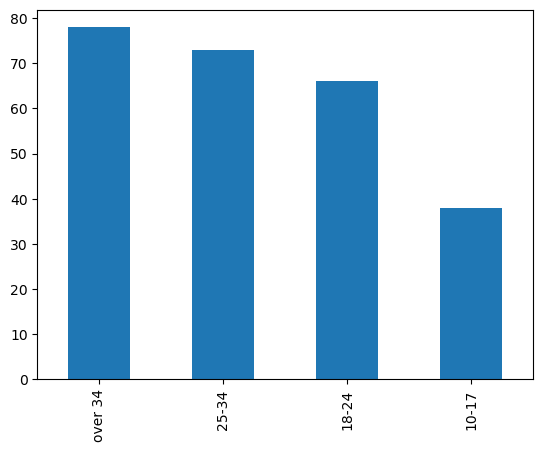

In [55]:
df_from_lists["age_range"].value_counts().plot.bar();

### Json_normalize
aneb jak jednoduše převést JSON na DataFrame

In [56]:
data

[{'age_range': '25-34',
  'outcome': 'A no further action disposal',
  'involved_person': True,
  'self_defined_ethnicity': 'Other ethnic group - Not stated',
  'gender': 'Male',
  'legislation': 'Police and Criminal Evidence Act 1984 (section 1)',
  'outcome_linked_to_object_of_search': False,
  'datetime': '2022-01-10T01:58:49+00:00',
  'removal_of_more_than_outer_clothing': False,
  'outcome_object': {'id': 'bu-no-further-action',
   'name': 'A no further action disposal'},
  'location': {'latitude': '51.546949',
   'street': {'id': 968804, 'name': 'On or near Supermarket'},
   'longitude': '-0.055415'},
  'operation': None,
  'officer_defined_ethnicity': 'Black',
  'type': 'Person and Vehicle search',
  'operation_name': None,
  'object_of_search': 'Article for use in theft'},
 {'age_range': '25-34',
  'outcome': 'A no further action disposal',
  'involved_person': True,
  'self_defined_ethnicity': 'Other ethnic group - Not stated',
  'gender': 'Male',
  'legislation': 'Police and 

In [57]:
from pandas import json_normalize

In [58]:
norm_data = json_normalize(data)

In [59]:
norm_data.head()

,age_range,outcome,involved_person,self_defined_ethnicity,gender,legislation,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,operation,officer_defined_ethnicity,type,operation_name,object_of_search,outcome_object.id,outcome_object.name,location.latitude,location.street.id,location.street.name,location.longitude
0,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),False,2022-01-10T01:58:49+00:00,False,None,Black,Person and Vehicle search,None,Article for use in theft,bu-no-further-action,A no further action disposal,51.546949,968804,On or near Supermarket,-0.055415
1,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),False,2022-01-23T04:11:54+00:00,False,None,Black,Person and Vehicle search,None,Firearms,bu-no-further-action,A no further action disposal,51.542384,964245,On or near Buxted Road,-0.073622
2,over 34,Arrest,True,White - English/Welsh/Scottish/Northern Irish/...,Female,Police and Criminal Evidence Act 1984 (section 1),None,2022-01-01T09:30:00+00:00,None,False,White,Person search,None,Stolen goods,bu-arrest,Arrest,51.550050,968845,On or near Supermarket,-0.054288
3,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Misuse of Drugs Act 1971 (section 23),None,2022-01-01T15:30:00+00:00,None,False,Black,Person search,None,Controlled drugs,bu-no-further-action,A no further action disposal,51.549626,968830,On or near Dalston Lane,-0.054738
4,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),None,2022-01-01T15:55:00+00:00,None,False,Black,Person and Vehicle search,None,Offensive weapons,bu-no-further-action,A no further action disposal,51.549686,968632,On or near John Campbell Road,-0.076386


In [60]:
norm_data["gender"].value_counts()

Male      246
Female     26
Name: gender, dtype: int64

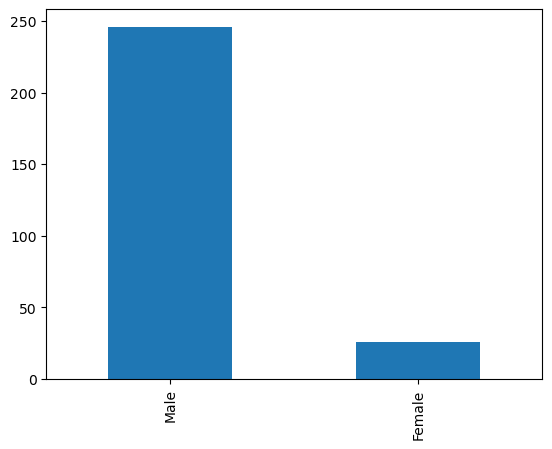

In [61]:
norm_data["gender"].value_counts().plot.bar();

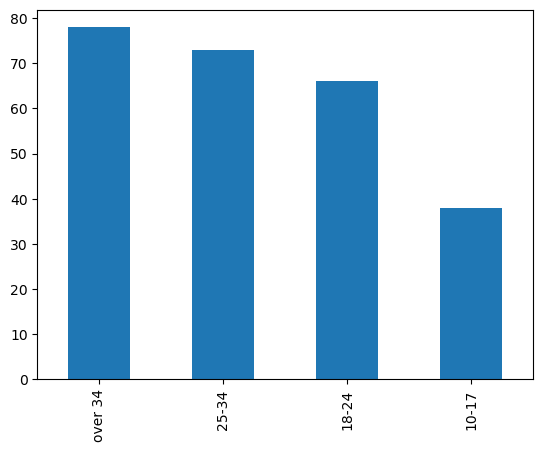

In [62]:
norm_data["age_range"].value_counts().plot.bar();

### Tvoříme vlastního klienta

V následujícím bloku si vytvoříme klienta, který nám stáhne data za dva měsíce (místo jednoho) a uloží je do seznamu seznamů (list of lists). Případné chyby spojení s API ošetříme výjimkami (exceptions) - více viz [dokumentace requests](https://requests.readthedocs.io/en/master/_modules/requests/exceptions/)

In [63]:
def get_uk_crime_data(latitude, longitude, dates_list):
    """
    Function loops through a list of dates 
    
    Three arguments latitude, longitude and a list of dates
    
    Returns a dataframe with crime data for each day
    """
    appended_data = []
    
    for i in dates_list:
        api_url = "https://data.police.uk/api/stops-street"
        params = {
            "lat" : latitude,
            "lng" : longitude,
            "date" : i
        }
        response = requests.get(api_url, params=params)
        data_foo = response.json()
            
        data = pd.json_normalize(data_foo)
        # store DataFrame in list
        appended_data.append(data)
       
    return pd.concat(appended_data)

Zavolání funkce get_uk_crime_data s parametry zeměpisné šíře a délky přiřazené proměnné df_uk_crime_data

In [64]:
dates_list = ["2022-01","2022-02"]
lat = "51.5487158"
lng = "-0.0613842"

df_uk_crime_data = get_uk_crime_data(lat, lng, dates_list)

In [65]:
df_uk_crime_data.head()

,age_range,outcome,involved_person,self_defined_ethnicity,gender,legislation,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,operation,officer_defined_ethnicity,type,operation_name,object_of_search,outcome_object.id,outcome_object.name,location.latitude,location.street.id,location.street.name,location.longitude
0,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),False,2022-01-10T01:58:49+00:00,False,None,Black,Person and Vehicle search,None,Article for use in theft,bu-no-further-action,A no further action disposal,51.546949,968804,On or near Supermarket,-0.055415
1,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),False,2022-01-23T04:11:54+00:00,False,None,Black,Person and Vehicle search,None,Firearms,bu-no-further-action,A no further action disposal,51.542384,964245,On or near Buxted Road,-0.073622
2,over 34,Arrest,True,White - English/Welsh/Scottish/Northern Irish/...,Female,Police and Criminal Evidence Act 1984 (section 1),None,2022-01-01T09:30:00+00:00,None,False,White,Person search,None,Stolen goods,bu-arrest,Arrest,51.550050,968845,On or near Supermarket,-0.054288
3,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Misuse of Drugs Act 1971 (section 23),None,2022-01-01T15:30:00+00:00,None,False,Black,Person search,None,Controlled drugs,bu-no-further-action,A no further action disposal,51.549626,968830,On or near Dalston Lane,-0.054738
4,25-34,A no further action disposal,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),None,2022-01-01T15:55:00+00:00,None,False,Black,Person and Vehicle search,None,Offensive weapons,bu-no-further-action,A no further action disposal,51.549686,968632,On or near John Campbell Road,-0.076386


## Přistupování k tweetům přes Twitter API pomocí knihovny Tweepy

Příkaz na instalaci knihovny tweepy uvnitř notebooku. Stačí odkomentovat a spustit.

In [ ]:
%pip install tweepy

In [66]:
import tweepy

Pro získání dat z Twitteru musí náš klient projít OAuth autorizací.

**Jak funguje OAuth autorizace na Twitteru?**

1. vývojář aplikace se zaregistruje u poskytovatele API
2. zaregistruje aplikaci, získá bearer_token, api key a api key secret na https://developer.twitter.com/en/apps
3. aplikace volá API a prokazuje se pomocí bearer tokenu

Další krok je vytvoření instance Clienta, do kterého vložíme náš bearer token

In [67]:
bearer_token = ''  # sem vlož svůj bearer token
api = tweepy.Client(bearer_token=bearer_token)

V API dokumentaci k Tweepy https://docs.tweepy.org/en/v4.12.1/client.html najdeme metodu která např. vypíše ID přátel, resp. sledujících účtu

In [68]:
api.get_user(username='kdnuggets')  # nejdřív potřebujeme ID účtu

Response(data=<User id=20167623 name=KDnuggets username=kdnuggets>, includes={}, errors=[], meta={})

In [ ]:
api.get_users_followers(20167623)

Nebo vypíše ID, které účet sleduje

In [ ]:
api.get_users_following(20167623)

Metoda, která vrátí posledních 10 tweetů podle ID uživatele

In [71]:
api.get_users_tweets(20167623)

Response(data=[<Tweet id=1599561752387239936 text='Designing Your #NeuralNetworks #KDnuggets https://t.co/hrWPzaZ97t'>, <Tweet id=1599546648253825025 text='7 Steps to Mastering Data Preparation for #MachineLearning with #Python — 2019 Edition #KDnuggets https://t.co/xwOUx8RnT0'>, <Tweet id=1599531550462431233 text='Data Analyst Skills You Need for Your Next Promotion #KDnuggets https://t.co/iLctzS2nrH'>, <Tweet id=1599516461373997058 text='24 SQL Questions You Might See on Your Next #Interview #KDnuggets https://t.co/Q4CywnV2rh'>, <Tweet id=1599501366212395013 text='Approaches to Text Summarization: An Overview #KDnuggets https://t.co/e0J9hKGirh'>, <Tweet id=1599486287827845131 text='20 Basic Linux Commands for #DataScience Beginners #KDnuggets https://t.co/jdwZPxYoWN'>, <Tweet id=1599471180943183873 text='Pandas Profiling: One-Line Magical Code for EDA #KDnuggets https://t.co/s3a4BexAYU'>, <Tweet id=1599456080131772416 text='#AI and the Metaverse #KDnuggets https://t.co/dPJ4hKoxlJ'>, 

In [72]:
twitter_data = api.get_users_tweets(20167623).data

In [73]:
kdnuggets_tweets = [i.text for i in twitter_data]
kdnuggets_tweets

['Designing Your #NeuralNetworks #KDnuggets https://t.co/hrWPzaZ97t',
 '7 Steps to Mastering Data Preparation for #MachineLearning with #Python — 2019 Edition #KDnuggets https://t.co/xwOUx8RnT0',
 'Data Analyst Skills You Need for Your Next Promotion #KDnuggets https://t.co/iLctzS2nrH',
 '24 SQL Questions You Might See on Your Next #Interview #KDnuggets https://t.co/Q4CywnV2rh',
 'Approaches to Text Summarization: An Overview #KDnuggets https://t.co/e0J9hKGirh',
 '20 Basic Linux Commands for #DataScience Beginners #KDnuggets https://t.co/jdwZPxYoWN',
 'Pandas Profiling: One-Line Magical Code for EDA #KDnuggets https://t.co/s3a4BexAYU',
 '#AI and the Metaverse #KDnuggets https://t.co/dPJ4hKoxlJ',
 '#DataScience is Overrated, Here’s Why #KDnuggets https://t.co/F54bS9xgUb',
 'Hyperparameter Tuning Using Grid Search and Random Search in #Python #KDnuggets https://t.co/BDLu5plnjS']

In [75]:
def get_tweets(bearer_token, twitter_account):
    """
    Function gets the last 20 tweets and adds those not in the list
    
    Two arguments: bearer token and twitter_account name
    
    Returns a dataframe with tweets for given account
    """
    
    api = tweepy.Client(bearer_token=bearer_token)

    try:
        twitter_user_id = api.get_user(username=twitter_account.lstrip('@')).data.id
        tweets = api.get_users_tweets(twitter_user_id)
        tweets_list = [i.text for i in tweets.data]
                      
    except Exception as e:
        print("Error getting tweets, exception: ", e)
        return None
    
    return pd.DataFrame(tweets_list, columns = [twitter_account])

In [77]:
get_tweets(bearer_token, '@honzajavorek')

,@honzajavorek
0,"@Liskni_si Upřímně, mám to spíš jako experimen..."
1,@Liskni_si Spíš to druhý 😀 Když má kanál zapnu...
2,"@madrvojt Pořád existuje RSS blogu, pokud to n..."
3,@Liskni_si Telegram je jako ICQ.\n\nTelegram k...
4,Chci se méně věnovat Twitteru.\n\nPokud vás ba...
5,"RT @JamesClear: When you say no, you are only ..."
6,Klub na https://t.co/gTcFP3Qavx je sice placen...
7,Luboš na svém blogu píše nejen o Javě a umění ...
8,Úvod do ekosystému Javy. Co když nakonec není ...
9,RT @JakubOnderka: GOVTECH – STÁTU BUDE CHYBĚT ...


Tweety můžeme vyhledávat i podle hashtagu!

In [ ]:
tweets = api.search_recent_tweets('#pydata', expansions='author_id')
for tweet, author in zip(tweets.data, tweets.includes['users']):
    print(author.username, tweet.text)

Takhle ale dostaneme jenom 10 posledních tweetů. Pokud by nám to nestačilo, tak podle dokumentace k metodě [search_recent_tweets](https://docs.tweepy.org/en/v4.12.1/client.html#tweepy.Client.search_recent_tweets) můžeme procházet další výsledky pomocí parametry next_token.

In [79]:
tweets.meta['next_token']

'b26v89c19zqg8o3fpzhn05cdz5ag9017otvz94cqqrbst'